# Iris Data Set Notebook
This is the ipynb notebook for practical part of the course. The notebook describes the ML workflow on Iris dataset.

## Exploring the Dataset
This section covers techniques for extraction of data and feature selection. First of all it is necessary to download the data from: https://www.kaggle.com/uciml/iris (the dataset can also be accessed from https://archive.ics.uci.edu/ml/machine-learning-databases/iris/). Another file worth looking at is https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names, which gives us short description of the dataset. I prefer reading it using my browser.

But if you are going to work on the server machine provided by IBVT, then there is no need to download them. They have been uploaded to the system's [dataset](https://zuse.ibvt.uni-stuttgart.de/services/ml/tree/source/Uebung1/datasets) folder.

### Loading the Dataset
Let us recall how to use `import` statements and perform some of the basic statistics on this dataset. Again we are normally working with the following libraries:
* `pandas` - working with datasets
* `numpy` - for math and statistics
* `matplotlib` - plotting useful functions/histograms

In [25]:
# import necessary libraries for data extraction
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

# load and summarize the dataset
from pandas import read_csv
from pandas import set_option

Again a little reminder:
* `read_csv()` - read a comma-separated values (csv)-excel files file into DataFrame.
* `DataFrame` - data structure that simply represents a table of data with rows and columns.

In [26]:
filename = 'datasets/iris.csv'
# load the csv file as a data frame
df_iris = read_csv(filename,names = ["Sepal Length","Sepal Width","Petal Length","Petal Width", "Class"])

In [27]:
df_iris

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Statistical Description of Dataframe

New definitions are:
* `describe()` - generates descriptive statistics. ! Output depends on provided dataset
* `include='all'` - argument named `include` with value `all` passed to the function `describe()` 

In [28]:
df_iris.describe(include="all")

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [29]:
#chooses only numerical datatypes and describes them
df_iris.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


A little statistics overview/meaning of notions:
* count - how many values we have
* mean - average value(sum/number_of_samples)
* std - standard deviation measures how observations deviate/differ from their expected value(normally is mean)
* percentile - 25/50/75% have scored less than or equal to certain value, e.g. 
  * 25% have value ≤ 0.34 for 'MCG'
  * 50% have value ≤ 0.50 for 'MCG'
  * 75% have value ≤ 0.66 for 'MCG'
* max - maximum value for a certain column

What about the 'Class' feature? According to the description of the dataset we have 4 predictive features, 1 name(which we removed) and 1 class distribution - which essentially is our output.

* 4 __numeric features__ - _inputs_ or domain of funtion
* 1 __class distribution__ - _output_ or range of function

### Plotting
Sometimes it is worth visualizing the data using a histogram or other technique. Visually it is more intiuitive for human eye to perceive the plot instead of tabular format. Here we discuss plotting. Definitions:
*  histogram - frequency distribution graph(in our case used for features)
* `hist()` - function for displaying a histogram
* `pyplot.show()` - show all the plots and go back to notebook

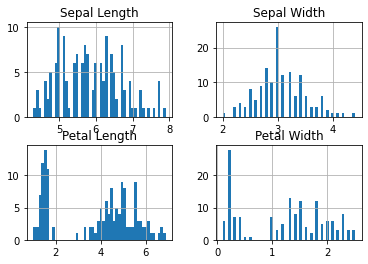

In [102]:
# create a histogram plot of each variable
df_iris.hist(bins=50)
# show the plot
plt.show()

## Main Framework for Machine Learning
Let us look into the data once more. As we can see our domain of function (in other words the inputs - X values) has 4 variables `Sepal Length,Sepal Width,Petal Length, Petal Width` and range of function is 1 variable which is the class(output or Y values). Main framework is shown below:
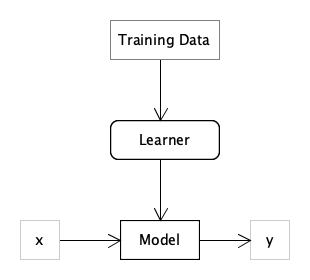

### Step 1. Training Data
Before going further we are first going to prepare the training data. Let us look at our dataframe once more:

In [31]:
# method head(n) means show first n columns
df_iris.head(4)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


In [33]:
#let us see how many data points we have
df_iris.count()

Sepal Length    150
Sepal Width     150
Petal Length    150
Petal Width     150
Class           150
dtype: int64

In [39]:
# let us check for 0 values
# code below says choose values that are 0 or null
# and sum the quantity
# as a result we can see table in a cell below
df_iris.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Class           0
dtype: int64

As we can see there __150 data points__ in our dataset. Let us start from __supervised learning__. Result of null values is shown above. Baically we can see that there are no null/0 values for every variable - which is good. We do not have to interfere in the dataset.

In [47]:
# value_counts() method tells us how many values of each class are there
df_iris['Class'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Class, dtype: int64

Let us visualize the above data. Let us take a look at one more library which is called saborn. Definitions:
* `import library as lb` - basically means import __`library`__ and name it __`lb`__ in our module;
* `seaborn` - Seaborn is a Python data visualization library based on matplotlib.

In [48]:
import seaborn as sns

/usr/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Class', ylabel='count'>

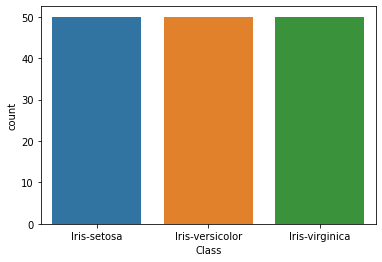

In [54]:
# the warning is just an information for future
sns.countplot(df_iris["Class"],x="Class")

So as it can be seen we have equal amount of each class on the figure. Documentation for [seaborn](https://seaborn.pydata.org/api.html).

__`Try it at home`: Other seaborn plots__. Look for `heatmap` in documentation on the correlation matrix of our iris dataset. What is the statistical interpretation of heatmap? 

For proceeding with our ML framework it is necessary to provide learning dataset and training dataset. Since we are given only one dataset we simply randomly divide given dataset into training and testing part using method from pandas: 
* `train_test_split(X,Y,test_size=0.2,random_state=50)`, where `X` - inputs, `Y` - outputs, `test_size` - 20%, `random_state` - shuffle 50 times, returns 4 values - _training inputs, training outputs, test inputs, test outputs_
* `replace(value_from,value_to)` - in our case we want to digitize the class names 

In [80]:
from sklearn.model_selection import train_test_split

df_iris = df_iris.replace(to_replace ="Iris-setosa",          value ="0") 
df_iris = df_iris.replace(to_replace ="Iris-versicolor",      value ="1") 
df_iris = df_iris.replace(to_replace ="Iris-virginica",       value ="2") 

X = np.array(df_iris[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']])                   # Input
Y = np.array(df_iris["Class"])                                                                            # Targets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 50)
# split is 80/20
len(X_train), len(Y_train), len(X_test), len(Y_test)

(120, 120, 30, 30)

### The Learner

First let us take a brief moment to look at documentation presented by [scikit-learn](https://scikit-learn.org/stable/user_guide.html#user-guide) and see which models we can use from that library. Let us now pick a method from each type of model. 

Remember! For:
* __supervised learning__ we need `input` features(`X`'s) and `output` features(`Y`'s);
* __unsupervised learning__ we need only input features(`X`'s).

The models we are looking at today are as follow:

* _SL: SGD: Classication_
* _SL: Ensemble - Adaboost_
* _UL: Clustering - Mean shift_

---

#### 1. SL: Decision Trees - Classification
Let us look into classification from Stochastic gradient descent. 

In [178]:
# Decision Trees
# Import DecisionTreeClassifier - refer to documentation
from sklearn.linear_model import SGDClassifier

# Import accuracy score method for calculating the accuracy and report
# might be needed for future models
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Initialize Classifier
# loss function will be hinge
sgd_clf = SGDClassifier(loss="squared_hinge", penalty="l2", max_iter=1500)

# fit to our training data
sgd_clf.fit(X_train, Y_train) # Training the model

SGDClassifier(loss='squared_hinge', max_iter=1500)

Let us check how our classifier has performed on test data. Couple of definitions:
* __metric__ - library that provides us with assessment tools:
    * `classification_report(test_data,predicted_data)` - using the parameters we get the scores for classification
    * `accuracy_score(test_data,predicted_data)` - how accurate our model performs on a given test set

In [179]:
# Performing Prediction on test input
Y_sgd_clf = sgd_clf.predict(X_test)

In [180]:
print ("Accuracy : ", accuracy_score(Y_test,Y_sgd_clf)*100) # Evaulating predictions with test data
print ("Report : ",  classification_report(Y_test, Y_sgd_clf))

Accuracy :  90.0
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.75      0.86        12
           2       0.75      1.00      0.86         9

    accuracy                           0.90        30
   macro avg       0.92      0.92      0.90        30
weighted avg       0.93      0.90      0.90        30



A little mindset detour:
* always refer to the [User Guide](https://scikit-learn.org/stable/user_guide.html)! User Guide tells us the details and mathematical meaning!
* do not forget about the [Documentation](https://scikit-learn.org/stable/modules/classes.html)! Documentation describes in detail the arguments a function/data type takes!
* google the term! E.g. `loss function`, `l2` and try to understand the meaning rather than details.
* finally train yourselves using Kaggle.

Statistical notions:
* __`precision`__: what proportion of positive identifications(result and prediction match) was actually correct?
* __`recall`__: what proportion of actual positives was identified correctly?
* __`f1-score`__: harmonically averaged precision and recall;
* __`support`__: how many actual instances do we have in a class (__score is used for Y_test!__)

Let us use seaborn module sns once again to test how good our model performed. Below you will find two countplots:
1. countplot for the `Y` values of actual(original) dataset;
2. countplot for the `Y` values of predicted model.


/usr/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

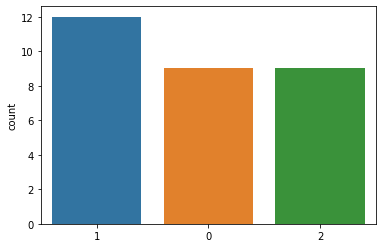

In [186]:
sns.countplot(Y_test,x="Class")

/usr/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

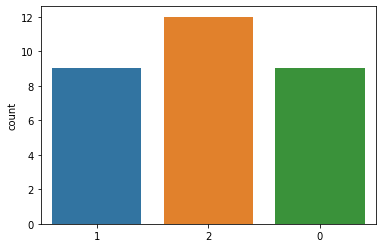

In [188]:
sns.countplot(Y_sgd_clf,x="Class")